In [1]:
from random import randint
from pandas import Timestamp, Timedelta
from numpy.fft import fft, ifft, fftfreq
from matplotlib import pyplot as plt
from scipy.signal.signaltools import wiener

import numpy as np
import scipy.signal as sg
def autocorrelation(arr:np.ndarray) -> np.ndarray:
    ret = arr-np.mean(arr)
    ret = sg.correlate(ret,ret,mode="full")[len(ret)-1:]
    # Required overlap of at least 33% of the data
    return ret[:2*len(ret)//3] / ret[0]

In [2]:
f = open("covid_confirmed_usafacts.csv","r")

headers = next(f).split(",")

for i in range(4,len(headers)):
    tmp = tuple(map(lambda x : int(x),headers[i].split("/")))

    headers[i] = Timestamp(year=2000+tmp[2], month=tmp[0], day=tmp[1])

validPeriods = []

for line in f:
    period = []
    inPeriod = False
    minI = 0
    maxI = 0
    line = line.rstrip().split(",")
    tmp = tuple(map(int,line[3:]))
    
    #print(tmp)
    
    for i in range(len(tmp)-1):
        n = tmp[i]
        if tmp[i+1] - n >= 20:
            if not inPeriod:
                minI = i
            inPeriod = True
        else:
            maxI = i
            if inPeriod:
                if len(period) >= 21:
                    validPeriod = (tuple(line[:3]),tuple(headers[minI+3:maxI+3]),np.array(period))
                    validPeriods.append(validPeriod)
                period=[]
                minI = 0
                maxI = 0
            inPeriod = False
            
        if inPeriod:
            period.append(n)

f.close()

maxI = 0
maxLen = 0
for i,period in enumerate(validPeriods):
    if len(period[2]) > maxLen:
        maxI = i
        maxLen = len(period[2])
        
#print(validPeriods[maxI])

In [8]:
# Exemples pertinents :
"""('34025', 'Monmouth County', 'NJ')
2020-03-20 00:00:00 2020-06-07 00:00:00
[53,92,158,238,288,313,501,634,781,870,1030,1140,1301,1458,1743,2065,2354,2545,2770,3038,3248,3496,3651,3785,3875,4003,4122,4299,4414,4528,4669,4787,4947,5086,5238,5368,5521,5671,5759,5826,5907,6033,6132,6198,6290,6378,6490,6552,6649,6752,6815,6894,6988,7041,7090,7164,7224,7297,7339,7408,7470,7541,7637,7695,7720,7800,7865,7911,7961,8012,8100,8159,8219,8249,8289,8332,8379,8428,8454,8478]"""
"""('17043', 'DuPage County', 'IL')
2020-03-28 00:00:00 2020-06-30 00:00:00
[202,274,320,356,392,448,500,590,656,715,795,875,943,1008,1048,1162,1223,1312,1386,1463,1560,1642,1695,1761,1864,1947,2047,2219,2311,2443,2628,2736,2870,3081,3256,3432,3611,3803,3918,4056,4213,4374,4493,4603,4745,5121,5244,5453,5634,5780,5904,6076,6171,6308,6471,6744,6891,7060,7207,7290,7350,7460,7543,7620,7707,7765,7818,7891,7939,7997,8046,8111,8157,8215,8255,8311,8355,8389,8434,8465,8495,8546,8574,8609,8646,8682,8715,8736,8780,8825,8879,8919,8951,8993,9032]"""
"""('12105', 'Polk County', 'FL')
2020-06-06 00:00:00 2020-10-08 00:00:00
[1145,1178,1206,1243,1287,1325,1373,1414,1466,1509,1566,1634,1702,1856,1970,2042,2225,2279,2454,2571,2780,3182,3495,3682,3836,4048,4327,4660,4906,5196,5472,5665,5895,6206,6611,6983,7246,7630,7881,8206,8498,8772,9030,9524,9877,10072,10309,10545,10909,11197,11423,11717,11893,12059,12281,12488,12735,12991,13137,13231,13419,13654,13839,14124,14301,14475,14645,14812,14992,15108,15312,15429,15506,15607,15723,15887,16015,16158,16251,16322,16388,16498,16569,16692,16803,16894,17011,17159,17292,17418,17566,17693,17799,17863,17932,18025,18121,18228,18337,18473,18523,18612,18674,18783,18915,19035,19126,19243,19339,19452,19551,19647,19765,19849,19888,19974,20032,20120,20217,20354,20425,20500,20587,20687,20814]"""
"""('12081', 'Manatee County', 'FL')
2020-06-11 00:00:00 2020-08-29 00:00:00
[1253,1309,1353,1377,1421,1483,1523,1548,1649,1786,1890,1977,2013,2132,2202,2368,2642,2737,2810,2856,3015,3175,3261,3554,3716,3785,3890,4080,4266,4432,4632,5112,5266,5419,5564,5914,6133,6280,6569,6738,6871,7078,7252,7520,7709,7859,7982,8090,8187,8337,8517,8655,8733,8825,8887,8938,9050,9124,9199,9288,9340,9395,9468,9554,9662,9735,9781,9843,9891,9924,9997,10059,10123,10170,10209,10241,10278,10310,10340,10391]"""
"""('21111', 'Jefferson County', 'KY')
2020-07-05 00:00:00 2020-08-21 00:00:00
[4034,4173,4233,4312,4395,4458,4522,4561,4588,4661,4709,4778,4861,4962,5170,5263,5441,5519,5635,5836,6080,6135,6320,6450,6549,6687,6888,7040,7131,7206,7414,7518,7666,7823,7984,8084,8188,8279,8802,8976,9149,9350,9505,9629,9749,9901,10054,10249]"""
"""('36087', 'Rockland County', 'NY')
2020-03-18 00:00:00 2020-05-16 00:00:00
[30,53,101,262,455,592,671,968,1197,1457,1896,2209,2511,2863,3321,3751,4289,4872,5326,5703,5990,6413,6665,7122,7477,7721,7965,8335,8474,8752,8987,9171,9364,9457,9568,9699,9828,10091,11091,11256,11366,11453,11586,11708,11812,11945,12025,12095,12144,12204,12280,12349,12400,12451,12484,12504,12543,12596,12637,12688]"""

"('36087', 'Rockland County', 'NY')\n2020-03-18 00:00:00 2020-05-16 00:00:00\n[30,53,101,262,455,592,671,968,1197,1457,1896,2209,2511,2863,3321,3751,4289,4872,5326,5703,5990,6413,6665,7122,7477,7721,7965,8335,8474,8752,8987,9171,9364,9457,9568,9699,9828,10091,11091,11256,11366,11453,11586,11708,11812,11945,12025,12095,12144,12204,12280,12349,12400,12451,12484,12504,12543,12596,12637,12688]"

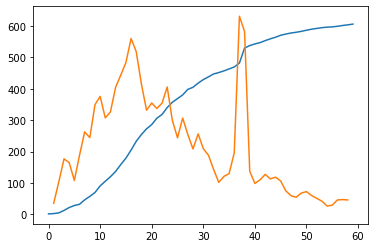

In [3]:
# Simple finite difference
#randI = randint(0,len(validPeriods)-1)
#randPeriod = validPeriods[randI][2]
randPeriod = np.array([30,53,101,262,455,592,671,968,1197,1457,1896,2209,2511,2863,3321,3751,4289,4872,5326,5703,5990,6413,6665,7122,7477,7721,7965,8335,8474,8752,8987,9171,9364,9457,9568,9699,9828,10091,11091,11256,11366,11453,11586,11708,11812,11945,12025,12095,12144,12204,12280,12349,12400,12451,12484,12504,12543,12596,12637,12688])

derivI = range(1,len(randPeriod)-1)
deriv = []
for i in derivI:
    deriv.append((randPeriod[i+1]-randPeriod[i-1])/2)
deriv = np.array(deriv)
    
#print(randI)
plt.plot(range(len(randPeriod)),randPeriod/(max(randPeriod)-min(randPeriod))*(max(deriv) - min(deriv)))
plt.plot(derivI,deriv)

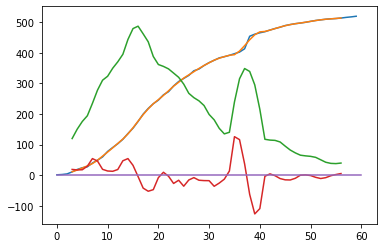

In [19]:
# Savitzky-Golay with 7-point convolution
#randI = randint(0,len(validPeriods)-1)
#randPeriod = validPeriods[randI][2]
randPeriod = np.array([30,53,101,262,455,592,671,968,1197,1457,1896,2209,2511,2863,3321,3751,4289,4872,5326,5703,5990,6413,6665,7122,7477,7721,7965,8335,8474,8752,8987,9171,9364,9457,9568,9699,9828,10091,11091,11256,11366,11453,11586,11708,11812,11945,12025,12095,12144,12204,12280,12349,12400,12451,12484,12504,12543,12596,12637,12688])

smoothedPeriod = []
smoothedD1 = []
smoothedD2 = []
savI = range(3,len(randPeriod)-3)
for i in savI:
    smoothedPeriod.append(1/21*(7*randPeriod[i]
        + 6*randPeriod[i-1] + 6*randPeriod[i+1]
        + 3*randPeriod[i-2] + 3*randPeriod[i+2]
        - 2*randPeriod[i-3] - 2*randPeriod[i+3]))
    smoothedD1.append(1/28*(0*randPeriod[i]
        - 1*randPeriod[i-1] + 1*randPeriod[i+1]
        - 2*randPeriod[i-2] + 2*randPeriod[i+2]
        - 3*randPeriod[i-3] + 3*randPeriod[i+3]))
    smoothedD2.append(1/42*(-4*randPeriod[i]
        - 3*randPeriod[i-1] - 3*randPeriod[i+1]
        + 0*randPeriod[i-2] + 0*randPeriod[i+2]
        + 5*randPeriod[i-3] + 5*randPeriod[i+3]))
smoothedPeriod = np.array(smoothedPeriod)
smoothedD1 = np.array(smoothedD1)
smoothedD2 = np.array(smoothedD2)

#print(validPeriods[randI][0])
#print(validPeriods[randI][1][0],validPeriods[randI][1][-1])
#print("[" + ",".join(map(str,randPeriod)) + "]")
plt.plot(range(len(randPeriod)),randPeriod/(max(smoothedPeriod) + min(smoothedPeriod))*(min(smoothedD1) + max(smoothedD1)))
plt.plot(range(3,len(randPeriod)-3),smoothedPeriod/(max(smoothedPeriod) + min(smoothedPeriod))*(min(smoothedD1) + max(smoothedD1)))
plt.plot(range(3,len(randPeriod)-3),smoothedD1)
#plt.plot(range(1,len(randPeriod)-1),(randPeriod[2:] - randPeriod[:-2])/2)
plt.plot(range(3,len(randPeriod)-3),smoothedD2)
plt.plot((0,len(randPeriod)),(0.0,0.0))

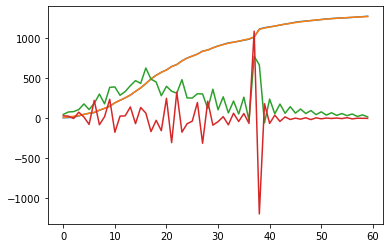

In [38]:
addedExtent = 1000
randPeriod = [30 for i in range(addedExtent)]
randPeriod.extend([30,53,101,262,455,592,671,968,1197,1457,1896,2209,2511,2863,3321,3751,4289,4872,5326,5703,5990,6413,6665,7122,7477,7721,7965,8335,8474,8752,8987,9171,9364,9457,9568,9699,9828,10091,11091,11256,11366,11453,11586,11708,11812,11945,12025,12095,12144,12204,12280,12349,12400,12451,12484,12504,12543,12596,12637,12688])
for i in range(addedExtent):
    randPeriod.append(12688)
randPeriod = np.array(randPeriod)
smoothedPeriod = np.array(wiener(randPeriod,7),dtype="complex")

x = np.arange(len(smoothedPeriod)-2*addedExtent)
xf = fftfreq(len(smoothedPeriod))

# Estimation de dérivées avec FFT
smoothedD1 = ifft(2*np.pi*1.0j*xf*fft(smoothedPeriod))
smoothedD2 = ifft((2*np.pi*1.0j*xf)**2*fft(smoothedPeriod))

plt.plot(x,randPeriod[addedExtent:-addedExtent]/10)
plt.plot(x,smoothedPeriod[addedExtent:-addedExtent]/10)
plt.plot(x,smoothedD1[addedExtent:-addedExtent])
plt.plot(x,smoothedD2[addedExtent:-addedExtent])

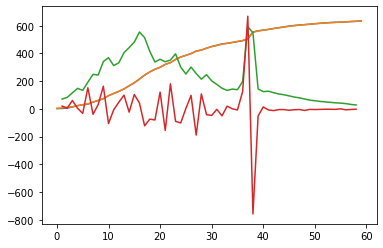

In [39]:
addedExtent = 1000
randPeriod = [30 for i in range(addedExtent)]
randPeriod.extend([30,53,101,262,455,592,671,968,1197,1457,1896,2209,2511,2863,3321,3751,4289,4872,5326,5703,5990,6413,6665,7122,7477,7721,7965,8335,8474,8752,8987,9171,9364,9457,9568,9699,9828,10091,11091,11256,11366,11453,11586,11708,11812,11945,12025,12095,12144,12204,12280,12349,12400,12451,12484,12504,12543,12596,12637,12688])
for i in range(addedExtent):
    randPeriod.append(12688)
randPeriod = np.array(randPeriod)
smoothedPeriod = wiener(randPeriod,7)[addedExtent:-addedExtent]
randPeriod = randPeriod[addedExtent:-addedExtent]

x = np.array(range(len(smoothedPeriod)))

smoothedD1 = []
smoothedD2 = []

# Estimation de dérivée avec central difference après smoothing
savI = range(1,len(randPeriod)-1)
for i in savI:
    smoothedD1.append(0.5*(smoothedPeriod[i+1] - smoothedPeriod[i-1]))
    smoothedD2.append(smoothedPeriod[i+1] - 2*smoothedPeriod[i] + smoothedPeriod[i-1])
smoothedD1 = np.array(smoothedD1)
smoothedD2 = np.array(smoothedD2)

#plt.plot(xf,yf)

#plt.plot(range(len(smoothedPeriod)),smoothedPeriod)
plt.plot(x,randPeriod/20)
plt.plot(x,smoothedPeriod/20)
plt.plot(x[1:-1],smoothedD1)
plt.plot(x[1:-1],smoothedD2)

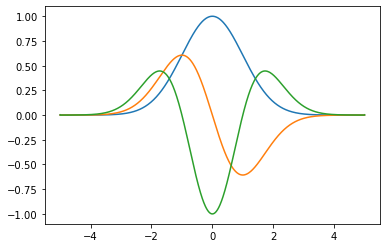

In [6]:
# Test d'estimation des dérivées avec FFT
x = np.linspace(-5,5,1001)
y = np.exp(-0.5*x**2)

xf = fftfreq(len(x),0.01)
yf = fft(y)
d1 = ifft(2*np.pi*1.0j*xf*fft(y))
d2 = ifft((2*np.pi*1.0j*xf)**2*fft(y))

plt.plot(x,y)
plt.plot(x,d1)
plt.plot(x,d2)

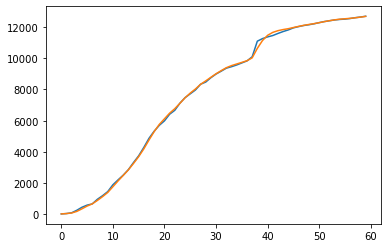

In [30]:
# Smoothing exponentiel double
randPeriod = np.array([30,53,101,262,455,592,671,968,1197,1457,1896,2209,2511,2863,3321,3751,4289,4872,5326,5703,5990,6413,6665,7122,7477,7721,7965,8335,8474,8752,8987,9171,9364,9457,9568,9699,9828,10091,11091,11256,11366,11453,11586,11708,11812,11945,12025,12095,12144,12204,12280,12349,12400,12451,12484,12504,12543,12596,12637,12688])

x = np.array(range(len(randPeriod)))

smoothedPeriods = []


alpha = 0.5
beta = 0.5
s = randPeriod[0]
smoothedPeriod = [s]
b = randPeriod[1] - randPeriod[0]

for i in range(1,len(randPeriod)):
    tmp = alpha*randPeriod[i] + (1.0-alpha)*(s + b)
    b = beta*(tmp - s) + (1-beta)*b
    s = tmp
    smoothedPeriod.append(s)

plt.plot(x,randPeriod)
plt.plot(x,smoothedPeriod)

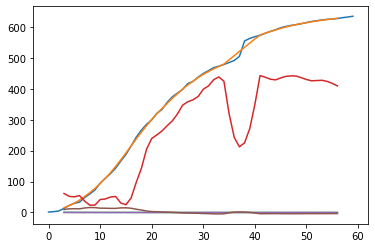

In [51]:
# Smoothing moyenne mobile sur 7 jours
randPeriod = np.array([30,53,101,262,455,592,671,968,1197,1457,1896,2209,2511,2863,3321,3751,4289,4872,5326,5703,5990,6413,6665,7122,7477,7721,7965,8335,8474,8752,8987,9171,9364,9457,9568,9699,9828,10091,11091,11256,11366,11453,11586,11708,11812,11945,12025,12095,12144,12204,12280,12349,12400,12451,12484,12504,12543,12596,12637,12688])

x = np.reshape(np.array(range(len(randPeriod))),(len(randPeriod),1))

y = np.empty((len(randPeriod),1))
y.fill(1.0)
y = np.append(y,np.reshape(randPeriod,(len(randPeriod),1)),axis=1)

smoothedPeriod = []
smoothedD1 = []
smoothedD2 = []

randPeriod = np.reshape(randPeriod,(len(randPeriod),1))

xSquares = np.append(x,x**2,axis=1)

for i in range(3,len(randPeriod) - 3):
    smoothedPeriod.append(np.sum(randPeriod[i-3:i+4])/7)
    xp2 = xSquares[i-3:i+4]
    yp = y[i-3:i+4]
    omega = np.matmul(np.linalg.inv(np.matmul(xp2.T,xp2)),np.matmul(xp2.T,yp))
    smoothedD1.append(omega[0])
    smoothedD2.append(omega[1])

smoothedPeriod = np.array(smoothedPeriod)
smoothedD1 = np.array(smoothedD1)
smoothedD2 = np.array(smoothedD2)

plt.plot(x,randPeriod/20)
plt.plot(x[3:-3],smoothedPeriod/20)
plt.plot(x[3:-3],smoothedD1)
plt.plot(x[3:-3],smoothedD2)